In [1]:
from diffusers import DiffusionPipeline
import torch

# load both base & refiner
base = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
)
base.to("cuda")
refiner = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-refiner-1.0",
    text_encoder_2=base.text_encoder_2,
    vae=base.vae,
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
)

refiner.to("cuda")

# Define how many steps and what % of steps to be run on each experts (80/20) here
n_steps = 30
high_noise_frac = 0.8

prompt = "A majestic lion jumping from a big stone at night"

# run both experts
image = base(
    prompt=prompt,
    num_inference_steps=n_steps,
    denoising_end=high_noise_frac,
    output_type="latent",
).images
image = refiner(
    prompt=prompt,
    num_inference_steps=n_steps,
    denoising_start=high_noise_frac,
    image=image,
).images[0]


/home/KDT-admin/miniconda3/envs/bonghoon/lib/python3.8/site-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
2024-02-22 14:37:35.852068: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-22 14:37:35.899413: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-22 14:37:36.815420: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/KDT-admin/miniconda3/envs/bonghoon/lib/python3.8/site-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_no

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

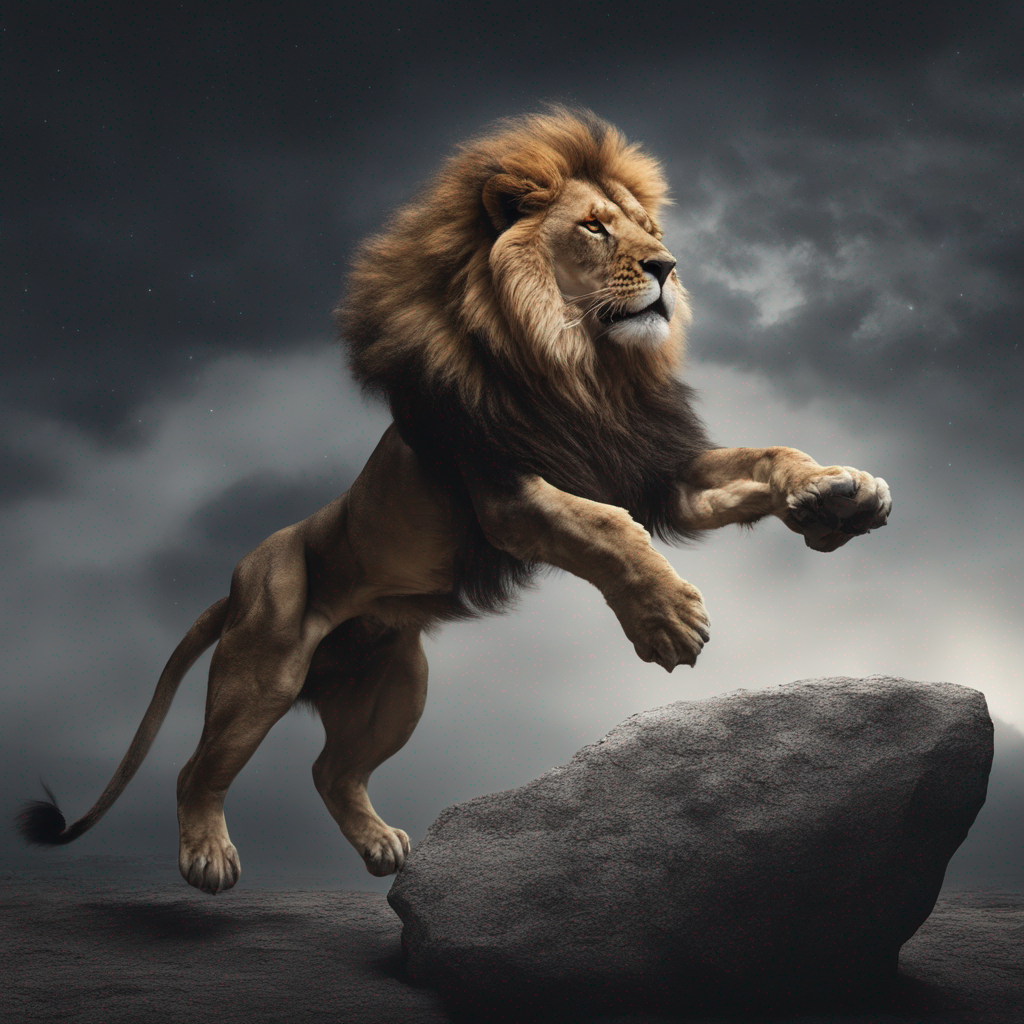

In [2]:
image

In [3]:
from translate import Translator

translator = Translator(from_lang="ko", to_lang='en')
translation = translator.translate("시계 토끼")
translation

'Watch rabbit'

In [6]:
def generate_image(text):
    print(f'ko : {text}')
    translation = translator.translate(text)
    print(f'en : {translation}')

    image = base(
        prompt=translation,
        num_inference_steps=n_steps,
        denoising_end=high_noise_frac,
        output_type="latent",
    ).images

    image = refiner(
        prompt=translation,
        num_inference_steps=n_steps,
        denoising_start=high_noise_frac,
        image=image,
    ).images[0]

    return image

In [7]:
def generate_image(text):
    print(f'ko : {text}')
    translation = translator.translate(text)
    print(f'en : {translation}')

    image = base(
        prompt=translation,
    ).images[0]

    return image

In [11]:
img = generate_image("사과 든 노인")

ko : 사과 든 노인
en : Old man with an apple


  0%|          | 0/50 [00:00<?, ?it/s]

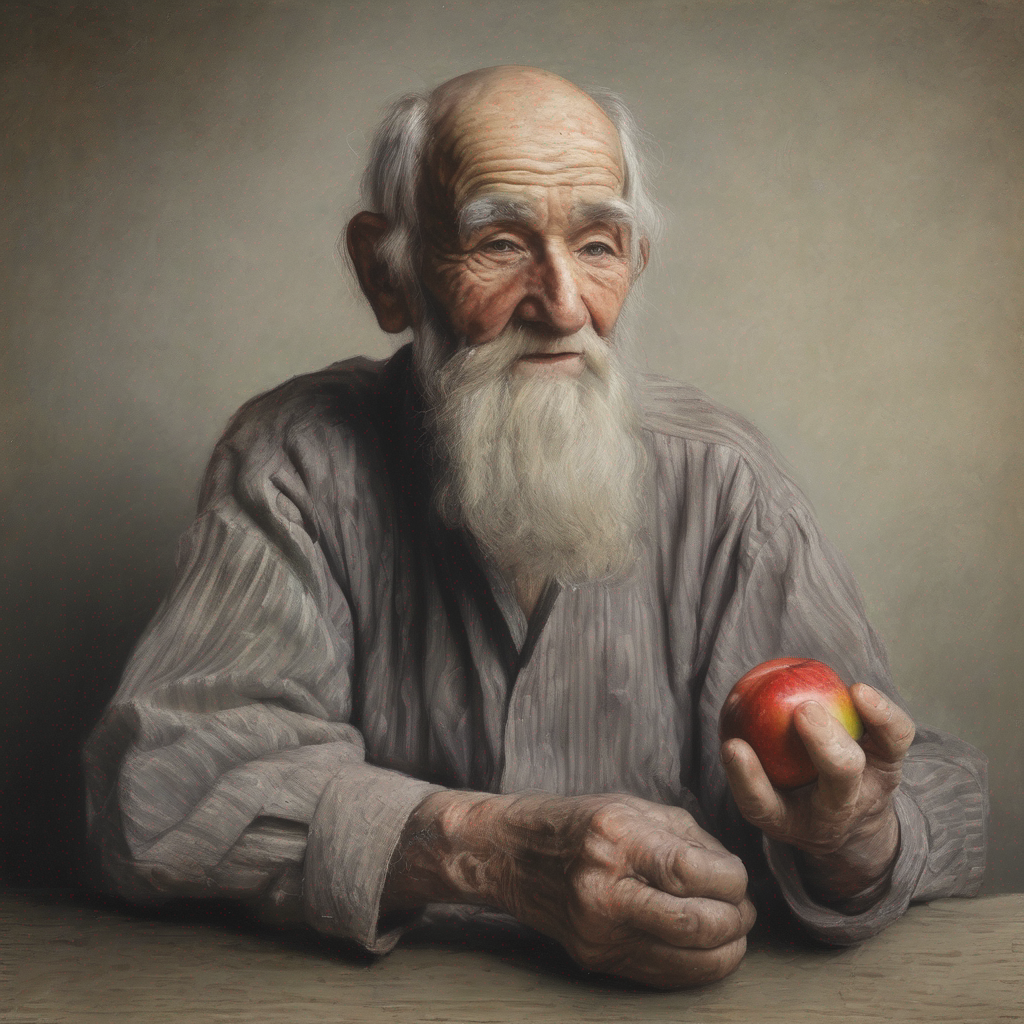

In [12]:
img

In [8]:
import gradio as gr

def inference(text):
    return generate_image(text)

demo = gr.Interface(fn=inference, inputs="text", outputs="image")
demo.launch(debug=True, share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://2de0cc57097caddf49.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


ko : A beautiful 20-year-old Korean woman is looking out the window with a happy smile. She captivates those around her with her unique charm. Her eyes are lively and enchanting, filled with dreams of her own future. The scene is portrayed with rich details and vibrant colors, giving the impression of meeting her in real life
en : A beautiful 20-year-old Korean woman is looking out the window with a happy smile. She captivates those around her with her unique charm. Her eyes are lively and enchanting, filled with dreams of her own future. The scene is portrayed with rich details and vibrant colors, giving the impression of meeting her in real life


  0%|          | 0/50 [00:00<?, ?it/s]

ko : A beautiful 20-year-old Korean woman is looking out the window with a happy smile. She captivates those around her with her unique charm. Her eyes are lively and enchanting, filled with dreams of her own future. The scene is portrayed with rich details and vibrant colors, giving the impression of meeting her in real life
en : A beautiful 20-year-old Korean woman is looking out the window with a happy smile. She captivates those around her with her unique charm. Her eyes are lively and enchanting, filled with dreams of her own future. The scene is portrayed with rich details and vibrant colors, giving the impression of meeting her in real life


  0%|          | 0/50 [00:00<?, ?it/s]

ko : A beautiful 20-year-old Korean woman is looking out the window with a happy smile. She captivates those around her with her unique charm. Her eyes are lively and enchanting, filled with dreams of her own future. The scene is portrayed with rich details and vibrant colors, giving the impression of meeting her in real life
en : A beautiful 20-year-old Korean woman is looking out the window with a happy smile. She captivates those around her with her unique charm. Her eyes are lively and enchanting, filled with dreams of her own future. The scene is portrayed with rich details and vibrant colors, giving the impression of meeting her in real life


  0%|          | 0/50 [00:00<?, ?it/s]

ko : A beautiful 20-year-old Korean woman is looking out the window with a happy smile. She captivates those around her with her unique charm. Her eyes are lively and enchanting, filled with dreams of her own future. The scene is portrayed with rich details and vibrant colors, giving the impression of meeting her in real life shownFrontFace 4k realistic
en : A beautiful 20-year-old Korean woman is looking out the window with a happy smile. She captivates those around her with her unique charm. Her eyes are lively and enchanting, filled with dreams of her own future. The scene is portrayed with rich details and vibrant colors, giving the impression of meeting her in real life shownFrontFace 4k realistic


  0%|          | 0/50 [00:00<?, ?it/s]

ko : A beautiful 20-year-old Korean woman is looking out the window with a happy smile. She captivates those around her with her unique charm. Her eyes are lively and enchanting, filled with dreams of her own future. The scene is portrayed with rich details and vibrant colors, giving the impression of meeting her in real life shownFrontFace 4k realistic
en : A beautiful 20-year-old Korean woman is looking out the window with a happy smile. She captivates those around her with her unique charm. Her eyes are lively and enchanting, filled with dreams of her own future. The scene is portrayed with rich details and vibrant colors, giving the impression of meeting her in real life shownFrontFace 4k realistic


  0%|          | 0/50 [00:00<?, ?it/s]

ko : A beautiful 20-year-old Korean woman is looking out the window with a happy smile. She captivates those around her with her unique charm. Her eyes are lively and enchanting, filled with dreams of her own future. The scene is portrayed with rich details and vibrant colors, giving the impression of meeting her in real life shownFrontFace 4k realistic Facing forward Looking straight ahead five finger 2 hands 


Token indices sequence length is longer than the specified maximum sequence length for this model (85 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['forward looking straight ahead five fingers 2 hands']
Token indices sequence length is longer than the specified maximum sequence length for this model (85 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['forward looking straight ahead five fingers 2 hands']


en : A beautiful 20-year-old Korean woman is looking out the window with a happy smile. She captivates those around her with her unique charm. Her eyes are lively and enchanting, filled with dreams of her own future. The scene is portrayed with rich details and vibrant colors, giving the impression of meeting her in real life shownFrontFace 4k realistic Facing forward Looking straight ahead five fingers 2 hands


  0%|          | 0/50 [00:00<?, ?it/s]

ko : A beautiful 20-year-old Korean woman is looking out the window with a happy smile. She captivates those around her with her unique charm. Her eyes are lively and enchanting, filled with dreams of her own future. The scene is portrayed with rich details and vibrant colors, giving the impression of meeting her in real life shownFrontFace 4k realistic Facing forward Looking straight ahead five finger 2 hands People facing forward


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['forward looking straight ahead five fingers 2 hands people facing forward']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['forward looking straight ahead five fingers 2 hands people facing forward']


en : A beautiful 20-year-old Korean woman is looking out the window with a happy smile. She captivates those around her with her unique charm. Her eyes are lively and enchanting, filled with dreams of her own future. The scene is portrayed with rich details and vibrant colors, giving the impression of meeting her in real life shownFrontFace 4k realistic Facing forward Looking straight ahead five fingers 2 hands People facing forward


  0%|          | 0/50 [00:00<?, ?it/s]

ko : A beautiful 20-year-old Korean woman is looking out the window with a happy smile. She captivates those around her with her unique charm. Her eyes are lively and enchanting, filled with dreams of her own future. The scene is portrayed with rich details and vibrant colors, giving the impression of meeting her in real life shownFrontFace 4k realistic Facing forward Looking straight ahead five finger 2 hands People facing forward


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['forward looking straight ahead five fingers 2 hands people facing forward']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['forward looking straight ahead five fingers 2 hands people facing forward']


en : A beautiful 20-year-old Korean woman is looking out the window with a happy smile. She captivates those around her with her unique charm. Her eyes are lively and enchanting, filled with dreams of her own future. The scene is portrayed with rich details and vibrant colors, giving the impression of meeting her in real life shownFrontFace 4k realistic Facing forward Looking straight ahead five fingers 2 hands People facing forward


  0%|          | 0/50 [00:00<?, ?it/s]

ko : A beautiful 20-year-old Korean woman is looking out the window with a happy smile. She captivates those around her with her unique charm. Her eyes are lively and enchanting, filled with dreams of her own future. The scene is portrayed with rich details and vibrant colors, giving the impression of meeting her in real life shownFrontFace 4k realistic Facing forward Looking straight ahead five finger 2 hands People facing forward


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['forward looking straight ahead five fingers 2 hands people facing forward']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['forward looking straight ahead five fingers 2 hands people facing forward']


en : A beautiful 20-year-old Korean woman is looking out the window with a happy smile. She captivates those around her with her unique charm. Her eyes are lively and enchanting, filled with dreams of her own future. The scene is portrayed with rich details and vibrant colors, giving the impression of meeting her in real life shownFrontFace 4k realistic Facing forward Looking straight ahead five fingers 2 hands People facing forward


  0%|          | 0/50 [00:00<?, ?it/s]

ko : A charming and youthful Korean woman in her twenties captivates with her adorable charm. Her radiant smile lights up the room, and her eyes sparkle with youthful energy. With a playful giggle, she exudes an infectious joy that brightens everyone's day. Dressed in trendy attire that accentuates her natural beauty, she effortlessly turns heads wherever she goes. Her bubbly personality and effortless grace make her the center of attention, drawing admiration from all who cross her path. She embodies the essence of youth and beauty, a true delight to behold
en : QUERY LENGTH LIMIT EXCEEDED. MAX ALLOWED QUERY : 500 CHARS


  0%|          | 0/50 [00:00<?, ?it/s]

ko : Imagine a delightful Korean woman in her twenties, radiating cuteness and beauty in stunning 4K detail. She embodies the epitome of charm and grace, with a captivating smile that mirrors her warm personality. Her genuine, down-to-earth demeanor makes her feel like a cherished friend you've known for years. In vivid 4K resolution, every detail of her appearance is crystal clear, from the sparkle in her eyes to the gentle curve of her smile. With her chic style and effortless elegance, she effortlessly commands attention wherever she goes. Get ready to be mesmerized by her natural beauty and charm, brought to life in breathtaking 4K clarity.
en : QUERY LENGTH LIMIT EXCEEDED. MAX ALLOWED QUERY : 500 CHARS


  0%|          | 0/50 [00:00<?, ?it/s]

ko : Imagine a delightful Korean woman in her twenties, radiating cuteness and beauty in stunning 4K detail. She embodies the epitome of charm and grace, with a captivating smile that mirrors her warm personality. Her genuine, down-to-earth demeanor makes her feel like a cherished friend you've known for years. In vivid 4K resolution, every detail of her appearance is crystal clear, from the sparkle in her eyes to the gentle curve of her smile. With her chic style and effortless elegance, she effortlessly commands attention wherever she goes. Get ready to be mesmerized by her natural beauty and charm, brought to life in breathtaking 4K clarity.
en : QUERY LENGTH LIMIT EXCEEDED. MAX ALLOWED QUERY : 500 CHARS


  0%|          | 0/50 [00:00<?, ?it/s]

ko : photo realistic portrait of [Emma Watson: Natalie Portman: 0.6], exquisitely rendered, stunning artistry, grace, enigmatic aura, rim lighting,  Meticulous attention, masterful brushwork korean girl like singer girl 
en : photo realistic portrait of [Emma Watson: Natalie Portman: 0.6], exquisitely rendered, stunning artistry, grace, enigmatic aura, rim lighting, Meticulous attention, masterful brushwork korean girl like singer girl


  0%|          | 0/50 [00:00<?, ?it/s]

ko : photo realistic portrait of korean woman singer iu exquisitely rendered, stunning artistry, grace, enigmatic aura, rim lighting,  Meticulous attention, masterful brushwork korean girl like singer girl 
en : photo realistic portrait of korean woman singer iu exquisitely rendered, stunning artistry, grace, enigmatic aura, rim lighting, meticulous attention, masterful brushwork korean girl like singer girl


  0%|          | 0/50 [00:00<?, ?it/s]

ko : photo realistic portrait of korean woman singer iu exquisitely rendered, stunning artistry, grace, enigmatic aura, rim lighting,  Meticulous attention, masterful brushwork korean girl like singer girl 
en : photo realistic portrait of korean woman singer iu exquisitely rendered, stunning artistry, grace, enigmatic aura, rim lighting, meticulous attention, masterful brushwork korean girl like singer girl


  0%|          | 0/50 [00:00<?, ?it/s]

ko : photo realistic portrait of korean woman singer iu exquisitely rendered, stunning artistry, grace, enigmatic aura, rim lighting,  Meticulous attention, masterful brushwork korean girl like singer girl 
en : photo realistic portrait of korean woman singer iu exquisitely rendered, stunning artistry, grace, enigmatic aura, rim lighting, meticulous attention, masterful brushwork korean girl like singer girl


  0%|          | 0/50 [00:00<?, ?it/s]

ko : photo realistic portrait of korean woman singer iu exquisitely rendered, stunning artistry, grace, enigmatic aura, rim lighting,  Meticulous attention, masterful brushwork korean girl like singer girl 
en : photo realistic portrait of korean woman singer iu exquisitely rendered, stunning artistry, grace, enigmatic aura, rim lighting, meticulous attention, masterful brushwork korean girl like singer girl


  0%|          | 0/50 [00:00<?, ?it/s]

ko : photo realistic portrait of korean woman singer iu exquisitely rendered, stunning artistry, grace, enigmatic aura, rim lighting,  Meticulous attention, masterful brushwork korean girl like singer girl realistic 4k Hyperrealistic
en : photo realistic portrait of korean woman singer iu exquisitely rendered, stunning artistry, grace, enigmatic aura, rim lighting, Meticulous attention, masterful brushwork korean girl like singer girl realistic 4k Hyperrealistic


  0%|          | 0/50 [00:00<?, ?it/s]

ko : photo realistic portrait of korean woman singer iu and suji exquisitely rendered, stunning artistry, grace, enigmatic aura, rim lighting,  Meticulous attention, masterful brushwork korean girl like singer girl realistic 4k Hyperrealistic
en : photo realistic portrait of korean woman singer iu and suji exquisitely rendered, stunning artistry, grace, enigmatic aura, rim lighting, Meticulous attention, masterful brushwork korean girl like singer girl realistic 4k Hyperrealistic


  0%|          | 0/50 [00:00<?, ?it/s]

ko : photo realistic portrait of korean woman singer iu and suji exquisitely rendered, stunning artistry, grace, enigmatic aura, rim lighting,  Meticulous attention, masterful brushwork korean girl like singer girl realistic 4k Hyperrealistic real 
en : photo realistic portrait of korean woman singer iu and suji exquisitely rendered, stunning artistry, grace, enigmatic aura, rim lighting, Meticulous attention, masterful brushwork korean girl like singer girl realistic 4k Hyperrealistic real


  0%|          | 0/50 [00:00<?, ?it/s]

ko : photo realistic portrait of korean woman singer iu and suji exquisitely rendered, stunning artistry, grace, enigmatic aura, rim lighting,  Meticulous attention, masterful brushwork korean girl like singer girl realistic 4k Hyperrealistic real 
en : photo realistic portrait of korean woman singer iu and suji exquisitely rendered, stunning artistry, grace, enigmatic aura, rim lighting, Meticulous attention, masterful brushwork korean girl like singer girl realistic 4k Hyperrealistic real


  0%|          | 0/50 [00:00<?, ?it/s]